## Scikit Learn

- free software machine learning library for Python
- developed by David Cournapeau as a Google summer of code project in 2007
- designed to interoperate with NumPy and SciPy
- features various classification, regression and clustering algorithms:
![](img/SKLearn/SKLearn.png)

**Great Sources:**
- https://scikit-learn.org/stable/user_guide.html
- https://towardsdatascience.com/hands-on-introduction-to-scikit-learn-sklearn-f3df652ff8f2
- https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
- https://towardsdatascience.com/random-useful-scikit-learn-methods-a032f78e1ec3
- https://www.youtube.com/watch?time_continue=7&v=0Lt9w-BxKFQ

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
#Loading dataset
wine = pd.read_csv('data/winequality-red.csv')

#### Data Processing
- Set an arbitrary cutoff for dependent variable (quality)
-  Good quality: 0-6.5; Bad quality: 6.5-8

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Preprocessing Data
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [7]:
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 
wine['quality'] = label_quality.fit_transform(wine['quality'])


In [8]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [9]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

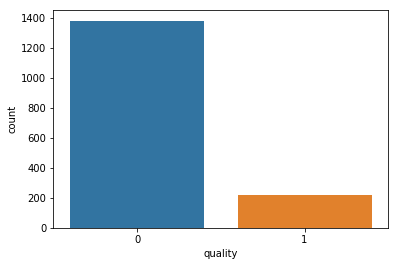

In [10]:
sns.countplot(wine['quality'])

In [11]:
#seperate respons variables and independant variable
X = wine.drop('quality', axis = 1)
y = wine['quality']
#train and test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
#Applying Standard scaling to get optimized results
sc = StandardScaler()

In [13]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### Random Forest Classifier

In [14]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test) 

In [15]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

             precision    recall  f1-score   support

          0       0.90      0.96      0.93       273
          1       0.66      0.40      0.50        47

avg / total       0.87      0.88      0.87       320

[[263  10]
 [ 28  19]]


Random forest gives the accuracy of **87%**

#### SVM Classifier

In [16]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [17]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

             precision    recall  f1-score   support

          0       0.88      0.98      0.93       273
          1       0.71      0.26      0.37        47

avg / total       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


#### Neural Network

In [18]:
mlpc = MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [19]:
#Let's see how our model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

             precision    recall  f1-score   support

          0       0.91      0.97      0.94       273
          1       0.70      0.45      0.55        47

avg / total       0.88      0.89      0.88       320

[[264   9]
 [ 26  21]]


In [20]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.88125

In [21]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [22]:
Xnew = [[7.3, 0.58, 0.00, 2.0, 0.065, 15.0, 21.0, 0.9946, 3.36, 0.47, 10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0], dtype=int64)

### Example: KNN using scikit-learn on Iris dataset

In [23]:
from sklearn.datasets import load_iris

In [24]:
iris = load_iris()

In [25]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [26]:
#Names of 4 features (column names)
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [27]:
#Integers representing the species: 0 = setosa, 1=versicolor, 2=virginica
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [28]:
# 3 classes of target
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [29]:
print(type(iris.data))
print(type(iris.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
# we have a total of 150 observations and 4 features
print(iris.data.shape)

(150, 4)


In [31]:
# Feature matrix in a object named X
X1 = iris.data
# response vector in a object named y
y1 = iris.target

In [32]:
print(X1.shape)
print(y1.shape)

(150, 4)
(150,)


#### Train the model

In [33]:
# splitting the data into training and test sets (80:20)
from sklearn.cross_validation import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=4)

C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
#shape of train and test objects
print(X1_train.shape)
print(X1_test.shape)

(120, 4)
(30, 4)


In [35]:
# shape of new y objects
print(y1_train.shape)
print(y1_test.shape)

(120,)
(30,)


In [36]:
#import the KNeighborsClassifier class from sklearn
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X1_train,y1_train)
        y1_pred=knn.predict(X1_test)
        scores[k] = metrics.accuracy_score(y1_test,y1_pred)
        scores_list.append(metrics.accuracy_score(y1_test,y1_pred))

In [37]:
#Testing accuracy for each value of K
scores

{1: 0.9333333333333333,
 2: 0.9333333333333333,
 3: 0.9666666666666667,
 4: 0.9666666666666667,
 5: 0.9666666666666667,
 6: 0.9666666666666667,
 7: 0.9666666666666667,
 8: 0.9666666666666667,
 9: 0.9666666666666667,
 10: 0.9666666666666667,
 11: 0.9666666666666667,
 12: 0.9666666666666667,
 13: 0.9666666666666667,
 14: 0.9666666666666667,
 15: 0.9666666666666667,
 16: 0.9666666666666667,
 17: 0.9666666666666667,
 18: 0.9666666666666667,
 19: 0.9666666666666667,
 20: 0.9333333333333333,
 21: 0.9666666666666667,
 22: 0.9333333333333333,
 23: 0.9666666666666667,
 24: 0.9666666666666667,
 25: 0.9666666666666667}

Text(0,0.5,'Testing Accuracy')

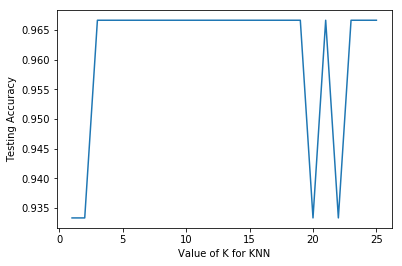

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### K values with 3 to 19 has the same accuracy which is 96.66, so we can use any one value from that, i choose K as 5 and train the model with full training data

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1,y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

#Making prediction on some unseen data 
#predict for the below two random observations
x1_new = [[3,4,5,2],
         [5,4,2,2]]
y1_predict = knn.predict(x1_new)

print(classes[y1_predict[0]])
print(classes[y1_predict[1]])

versicolor
setosa


## Scikit Learn Cheat Sheet

#### Loading The Data
Data needs to be numeric and stored as NumPy arrays or SciPy sparse matrices. Other types that are convertible to numeric arrays, such as Pandas DataFrame, are also acceptable.

In [41]:
# import numpy as np
# X = np.random.random((10,5))
# y = np.array(['M','M','F','F','M','F','M','M','F','F','F'])

### Preprocessing The Data

#### Standardization

In [42]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler().fit(X_train)
# standardized_X = scaler.transform(X_train)
# standardized_X_test = scaler.transform(X_test)

#### Normalization

In [43]:
# from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train)
# normalized_X = scaler.transform(X_train)
# normalized_X_test = scaler.transform(X_test)

#### Binarization

In [44]:
# from sklearn.preprocessing import Binarizer
# binarizer = Binarizer(threshold=0.0).fit(X)
# binary_X = binarizer.transform(X)

#### Encoding Categorical Features

In [45]:
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)

#### Imputing Missing Values

In [46]:
# from sklearn.preprocessing import Imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0)
# imp.fit_transform(X_train)

#### Generating Polynomial Features

In [47]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(5)
# oly.fit_transform(X)

### Training And Test Data

In [48]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

### Create Your Model

### Supervised Learning Estimators

#### Linear Regression

In [49]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)

#### Support Vector Machines (SVM)

In [50]:
# from sklearn.svm import SVC
# svc = SVC(kernel='linear')

#### Naive Bayes

In [51]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()

#### KNN

In [52]:
# from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

### Unsupervised Learning Estimators

#### Principal Component Analysis (PCA)

In [53]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

#### K Means

In [54]:
# from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0)

### Model Fitting

#### Supervised learning

In [55]:
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)

#### Unsupervised Learning

In [56]:
# k_means.fit(X_train)
# pca_model = pca.fit_transform(X_train)

### Prediction

#### Supervised Estimators

In [57]:
# y_pred = svc.predict(np.random.random((2,5)))
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test))

#### Unsupervised Estimators

In [58]:
# y_pred = k_means.predict(X_test)

### Evaluate Your Model’s Performance

### Classification Metrics

#### Accuracy Score

In [59]:
# knn.score(X_test, y_test)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

#### Classification Report

In [60]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred)))

#### Confusion Matrix

In [61]:
# from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_test, y_pred)))

### Regression Metrics

#### Mean Absolute Error

In [62]:
# from sklearn.metrics import mean_absolute_error
# y_true = [3, -0.5, 2])
# mean_absolute_error(y_true, y_pred))

#### Mean Squared Error

In [63]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred))

#### R2 Score

In [64]:
# from sklearn.metrics import r2_score
# r2_score(y_true, y_pred))

### Clustering Metrics

#### Adjusted Rand Index

In [65]:
# from sklearn.metrics import adjusted_rand_score
# adjusted_rand_score(y_true, y_pred))

#### Homogeneity

In [66]:
# from sklearn.metrics import homogeneity_score
# homogeneity_score(y_true, y_pred))

#### V - Measure

In [67]:
# from sklearn.metrics import v_measure_score
# metrics.v_measure_score(y_true, y_pred))

### Cross-Validation

In [68]:
# print(cross_val_score(knn, X_train, y_train, cv=4))
# print(cross_val_score(lr, X, y, cv=2))